# Seasonal Data Analysis & forecasting

- Dataset used: Employed Persons in Midwest Census Region ( 01/1976 to 02/2022)
- Goal        : Understanding Seasonal data, analysis and forecasting
- Developer: Yogesh Awdhut Gadade

<a id='index'></a>
# Content of the notebook:
1. <a href="#Section1"> Data loading, Preprocessing </a>
2. <a href="#Section2"> EDA </a>
3. <a href="#Section3"> Stationarity check</a>
    - Seasonality, trend, Decomposition, ADF test
    - ACF, PACF 
4. <a href="#SectionMakeStationary">Making Employed Person data stationary</a>
5. <a href="#Section4"> Time Series Forecasting analysis with ARIMA - Fitting, Validating, </a>
6. <a href="#Section5"> Facebook Prophet</a>
7. <a href="#Section6"> Comparision of results</a>

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8  # defining all figure size in this notebook
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
pdInput=pd.read_excel("/content/sample_data/Seasonal_ME_employmentJan1976_Feb2022.xlsx",  index_col=None)
# Renaming the column names
pdInput=pdInput.rename(columns={'observation_date': "Monthly", "LAURD920000000000005": "Values"})
y = pdInput.set_index("Monthly")
y.head(5)

,Values
Monthly,
1976-01-01,23497992
1976-02-01,23587085
1976-03-01,23817394
1976-04-01,24129936
1976-05-01,24410151


<a id='Section5'></a>
# 5. Facebook Prophet

pdInput=pd.read_excel("/content/sample_data/Seasonal_ME_employmentJan1976_Feb2022.xlsx",  index_col=None)
#Renaming the column names
pdInput=pdInput.rename(columns={'observation_date': "Monthly", "LAURD920000000000005": "Values"})
y = pdInput.set_index("Monthly")
y.head(5)

In [4]:
from fbprophet import Prophet 
from fbprophet.diagnostics import cross_validation

In [27]:
def forecast_values(pdInput, seasonalityMode, ForecastingPeriod, Frequency):  
  # seasonalityMode can be "multiplicative" or "additive"
  model = Prophet(interval_width=0.95, seasonality_mode= seasonalityMode, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
  model.fit(pdInput)
  future_pd = model.make_future_dataframe(periods=ForecastingPeriod, freq=Frequency) 
  forecast_pd = model.predict(future_pd)
  f_pd = forecast_pd[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].set_index('ds')
  st_pd = pdInput[['ds', 'y']].set_index('ds')
  result_pd = f_pd.join(st_pd, how='left')
  result_pd.reset_index(level=0, inplace=True)
  #result_pd['CryptoId'] = pdInput['CryptoId'].iloc[0]

  return result_pd[['ds', 'y', 'yhat', 'yhat_upper', 'yhat_lower']], model, forecast_pd

In [6]:
def calculate_accuracy(results):
  from sklearn.metrics import mean_absolute_error
  final_df = results.set_index('ds')

  pdTemp=final_df[['y', 'yhat']]
    
  # calculate Mean Absolute Error (MAE) between expected and predicted values for december
  y_true = pdTemp.dropna()['y'].values
  y_pred = pdTemp.dropna()['yhat'].values

  mae = mean_absolute_error(y_true, y_pred)
  print(': MAE: %.3f' % mae)

  eval_df = pdTemp.dropna()[['y', 'yhat']]
  eval_df['abs_error'] = abs(eval_df['y'] - eval_df['yhat'])
  total_y = sum(eval_df['y'])
  total_error=sum(eval_df['abs_error'])
  forecast_acc=1-(total_error/total_y)
  print("Forecating Accuracy: ", forecast_acc)

  eval_df['abs_error'].plot(title='Absolute Error plot')
  plt.plot()

  return


In [14]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 42.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [18]:
ForecastingPeriod = 12*3   # prediction for next 12*3 =>  3 years upto 2025
Frequency = "M" # Monthly 
x = pdInput.rename(columns={'Monthly': "ds", "Values": "y"})

In [19]:
# Spliting data into training and testing sets 
#from pmdarima import model_selection
#train, test = model_selection.train_test_split(x, train_size=450)

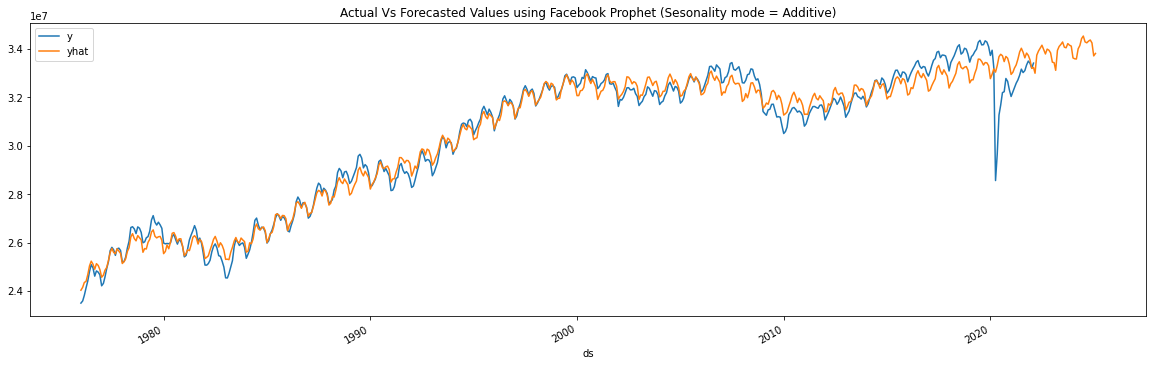

In [31]:
results, model, forecast_pd = forecast_values(x, "additive", ForecastingPeriod, Frequency)
results.set_index('ds')[['y', 'yhat']].plot(figsize=(20, 6), title="Actual Vs Forecasted Values using Facebook Prophet (Sesonality mode = Additive)")

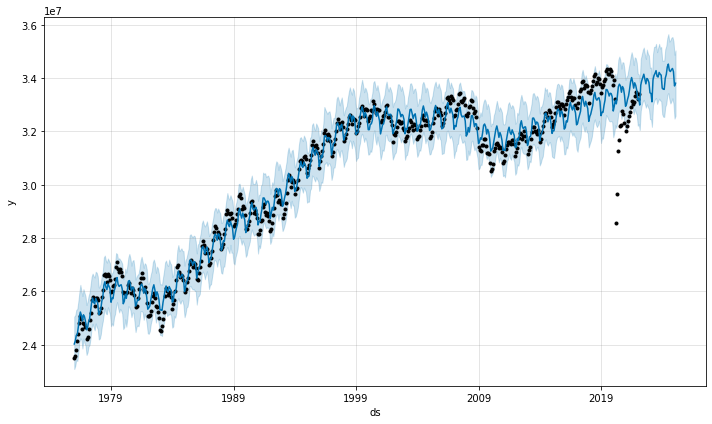

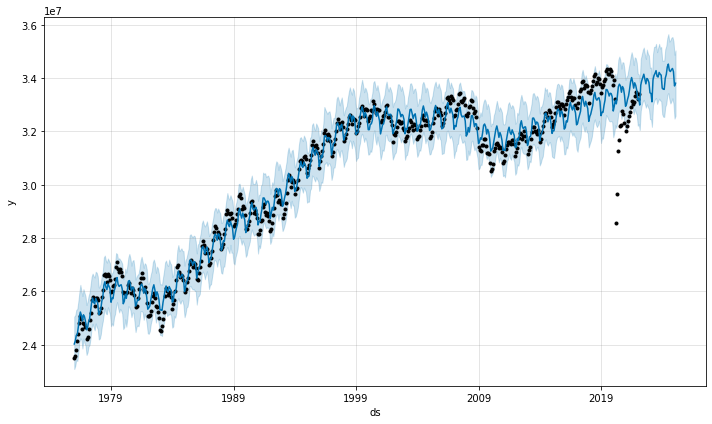

In [32]:
model.plot(forecast_pd)

In [ ]:
model.

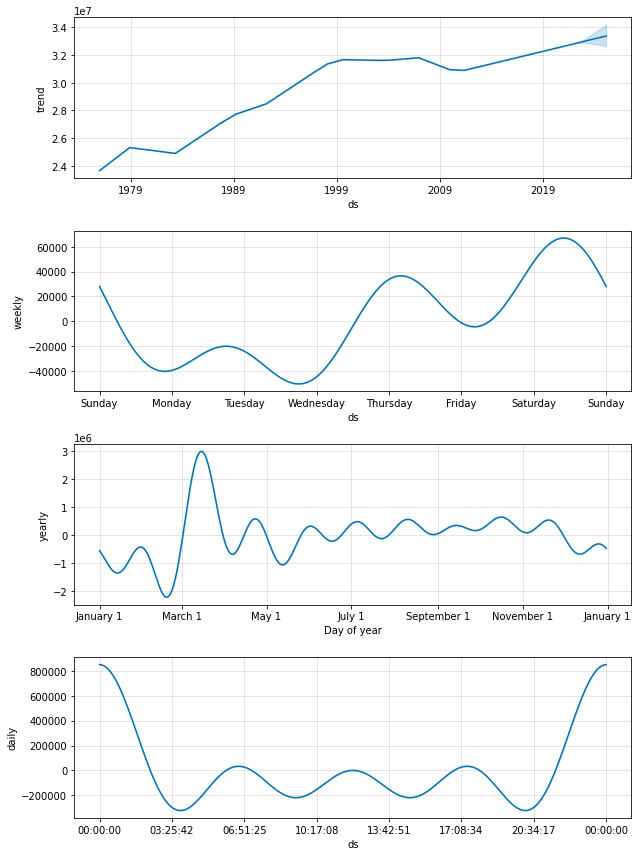

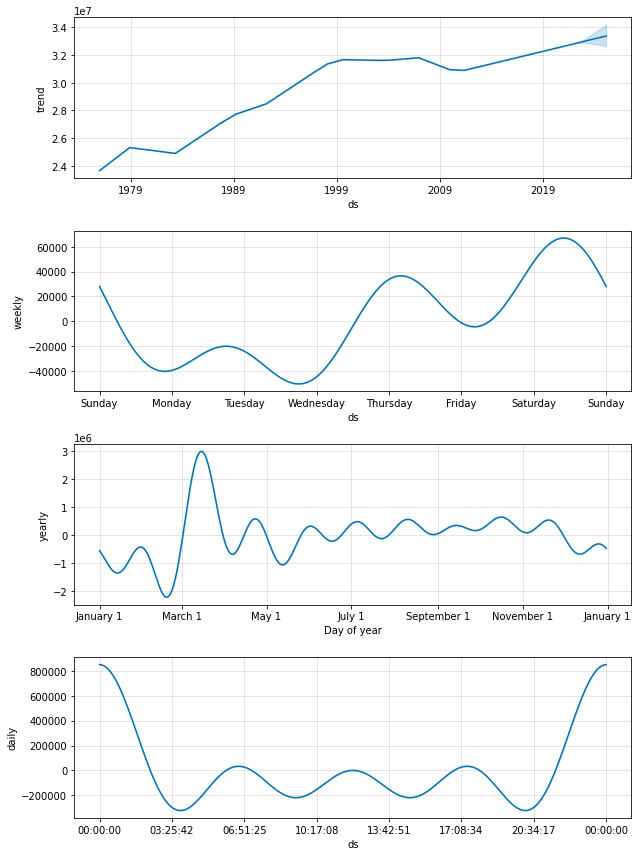

In [33]:
model.plot_components(forecast_pd)

In [ ]:
# Python
model = Prophet(interval_width=0.95, seasonality_mode= seasonalityMode, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(pdInput)

forecast = Prophet(interval_width=0.95).fit(df).predict(future)

In [21]:
fc=results.get_forecast(len(test), alpha=0.05).summary_frame()
fc_series = pd.Series(fc['mean'], index=test.index)
lower_series = pd.Series(fc['mean_ci_lower'], index=test.index)
upper_series = pd.Series(fc['mean_ci_upper'], index=test.index)

plt.figure(dpi=100)
plt.plot(train, label='training data')
plt.plot(test, color = 'blue', label='Actual Data')
plt.plot(fc_series, color='orange', label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.05)
plt.title("Bike Sharing Prediction")
plt.xlabel("Time")
plt.ylabel("Bike Sharing")
plt.legend(loc="upper left", fontsize=8)
plt.show()

AttributeError: ignored

: MAE: 342751.458
Forecating Accuracy:  0.9886804657212449


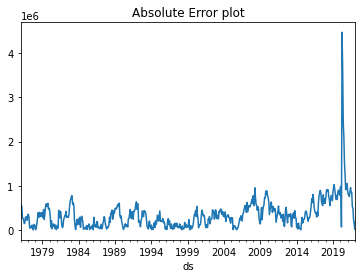

In [9]:
calculate_accuracy(results)

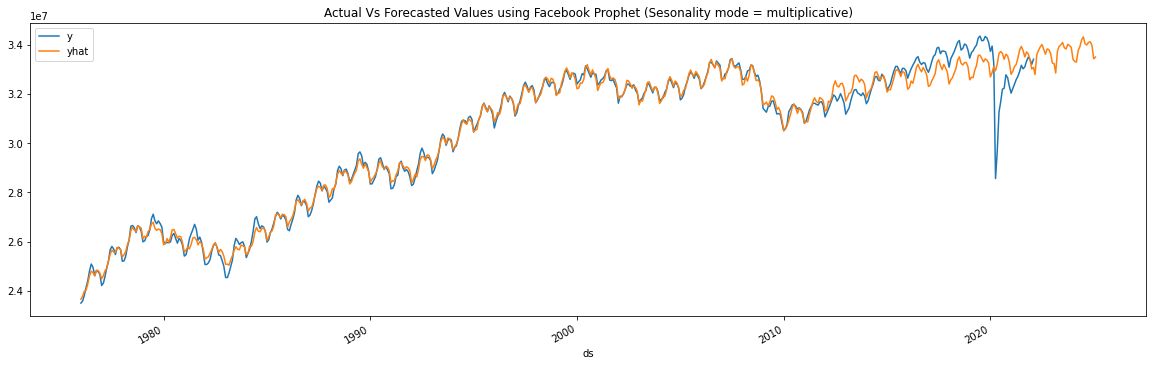

In [10]:
results = forecast_values(x, "multiplicative", ForecastingPeriod, Frequency)
results.set_index('ds')[['y', 'yhat']].plot(figsize=(20, 6), title="Actual Vs Forecasted Values using Facebook Prophet (Sesonality mode = multiplicative)")

: MAE: 229766.079
Forecating Accuracy:  0.992411863023415


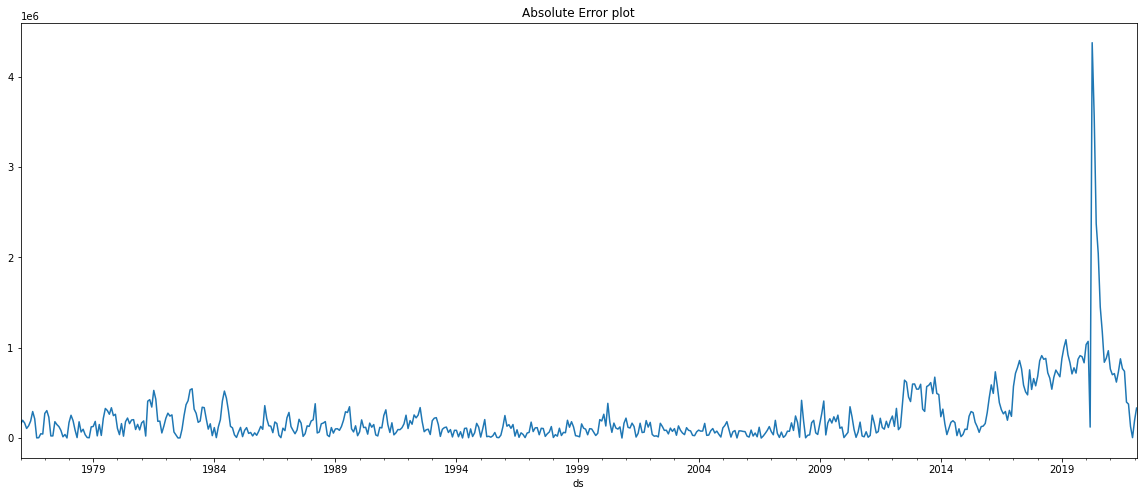

In [20]:
calculate_accuracy(results)

# Non Seasonal Dataset

In [21]:
def forecast_values(pdInput, seasonalityMode, ForecastingPeriod, Frequency):  
  # seasonalityMode can be "multiplicative" or "additive"
  model = Prophet(interval_width=0.95, seasonality_mode= seasonalityMode, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
  model.fit(pdInput)
  future_pd = model.make_future_dataframe(periods=ForecastingPeriod, freq=Frequency) 
  forecast_pd = model.predict(future_pd)
  f_pd = forecast_pd[['ds', 'yhat', 'yhat_upper', 'yhat_lower']].set_index('ds')
  st_pd = pdInput[['ds', 'y']].set_index('ds')
  result_pd = f_pd.join(st_pd, how='left')
  result_pd.reset_index(level=0, inplace=True)
  #result_pd['CryptoId'] = pdInput['CryptoId'].iloc[0]

  return result_pd[['ds', 'y', 'yhat', 'yhat_upper', 'yhat_lower']]

In [24]:
pdInputDay=pd.read_csv("/content/sample_data/day.csv")
pdInputDay['dteday']=pd.to_datetime(pdInputDay['dteday'])

#casual: count of casual users
#registered: count of registered users
#cnt: count of total rental bikes including both casual and registered
pdInputDay=pdInputDay.rename(columns={'dteday':'ds', 'casual': "CasualUsers",'registered':"RegisteredUsers", 'cnt': "y"})

x = pdInputDay[['ds','y']]
x.head(5)

,ds,y
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


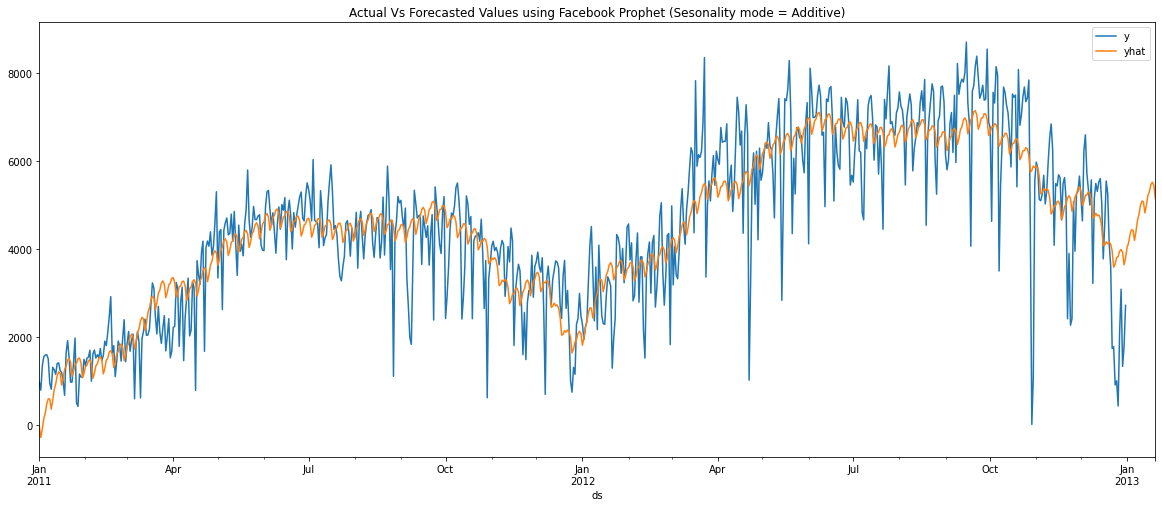

In [25]:
ForecastingPeriod=20  # next 50 days
Frequency = "D" # Daily 
results = forecast_values(x, "additive", ForecastingPeriod, Frequency)
results.set_index('ds')[['y', 'yhat']].plot( title="Actual Vs Forecasted Values using Facebook Prophet (Sesonality mode = Additive)")

: MAE: 704.081
Forecating Accuracy:  0.8436885702254947


[]

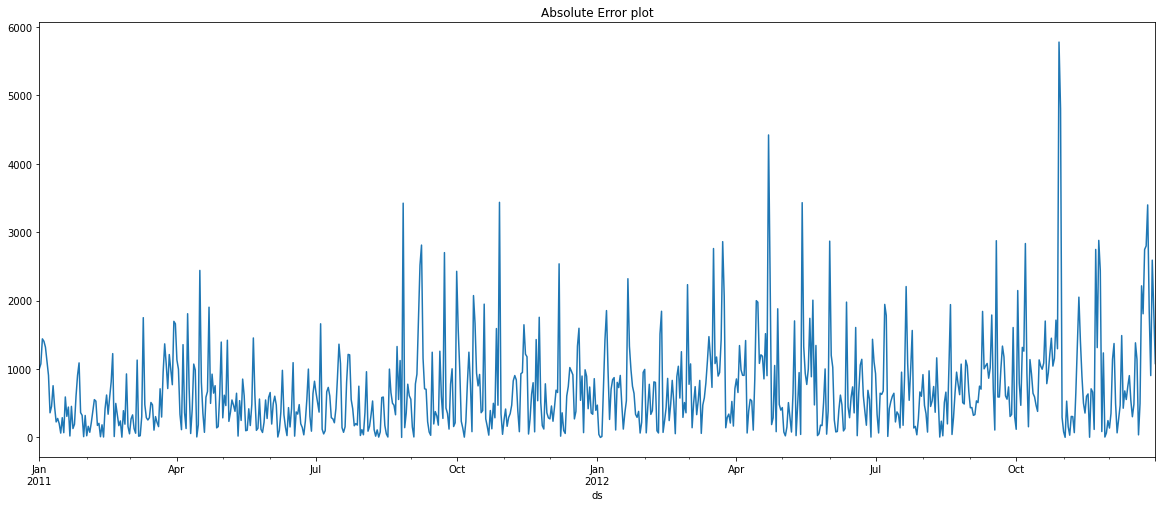

In [26]:
calculate_accuracy(results)
plt.plot()

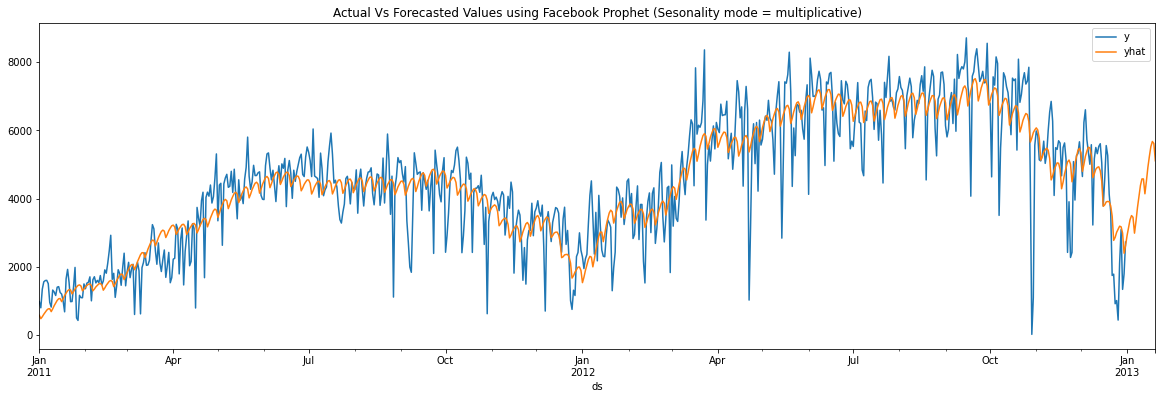

In [29]:
results = forecast_values(x, "multiplicative", ForecastingPeriod, Frequency)
results.set_index('ds')[['y', 'yhat']].plot(figsize=(20, 6), title="Actual Vs Forecasted Values using Facebook Prophet (Sesonality mode = multiplicative)")

: MAE: 667.839
Forecating Accuracy:  0.8517345095514613


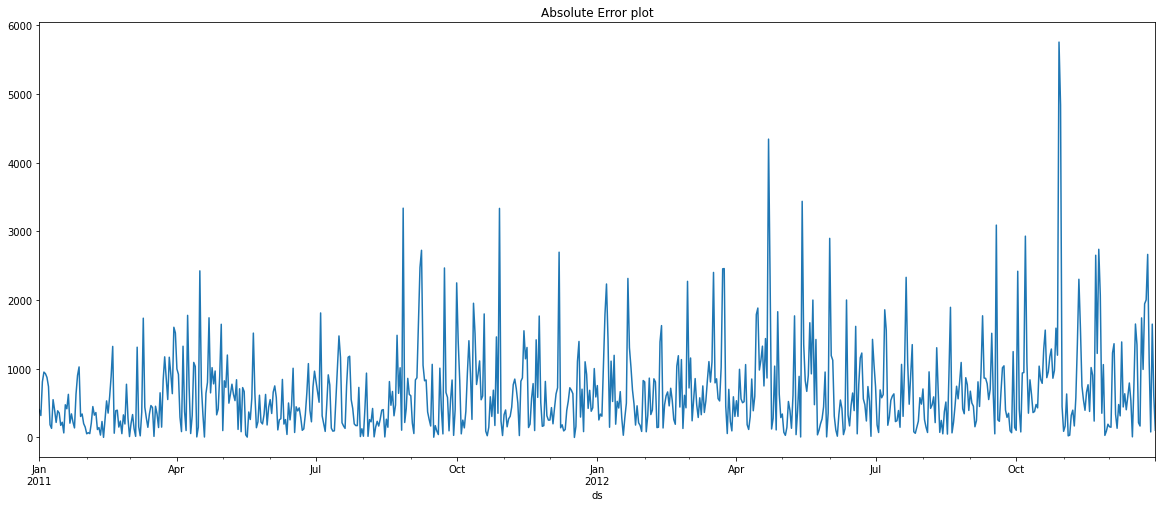

In [30]:
calculate_accuracy(results)

In [33]:
! pip install statsmodels

Go back to <a href="#index">Content of the notebook index</a>

# References:
- https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b 
- Stationarity and non-stationarity: https://machinelearningmastery.com/time-series-data-stationary-python/
- https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/07e04fb0-9eaf-44fa-b064-7ac9856b2881/view?access_token=4c59dfbbf611086f25d77bd305057babed2d9c523645d57f67b0d98379a8e35f
- https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data